In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('cleaned_thesis_dataset_rev.csv')

In [66]:
df.head()

,Age,Financial Status,Has a Laptop,Type of Internet Connection,CC100,CC101,CC102,CS111/IT112,English Prof,Reading Compre,...,GAS,HUMSS,STEM,Sports Track,TVL-HE,TVL-ICT,Female,Male,Prefer not to say,label
0,22,5,2,2,7,6,6,7,41.05,30.03,...,0,0,0,0,0,1,0,1,0,0
1,24,1,2,1,3,2,6,5,61.05,48.40,...,0,0,0,0,0,1,0,1,0,1
2,21,1,2,2,9,7,7,7,49.95,71.99,...,0,0,1,0,0,0,1,0,0,1
3,22,0,0,2,6,9,2,8,89.71,77.12,...,0,0,0,0,0,0,0,1,0,1
4,23,1,2,2,8,9,7,8,95.51,71.99,...,0,0,0,0,0,1,1,0,0,1


In [67]:
df.shape

(428, 26)

In [68]:
features = df.columns[:25]
features

Index(['Age', 'Financial Status', 'Has a Laptop',
       'Type of Internet Connection', 'CC100', 'CC101', 'CC102', 'CS111/IT112',
       'English Prof', 'Reading Compre', 'Science Process', 'Quantitative',
       'Abstract', 'CET OAPR', 'SHS/HS GPA', 'ABM/BAM', 'GAS', 'HUMSS', 'STEM',
       'Sports Track', 'TVL-HE', 'TVL-ICT', 'Female', 'Male',
       'Prefer not to say'],
      dtype='object')

In [69]:
target = df.columns[-1:]
target

Index(['label'], dtype='object')

In [70]:
X = df.drop(['label'], axis=1)
y = df['label']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


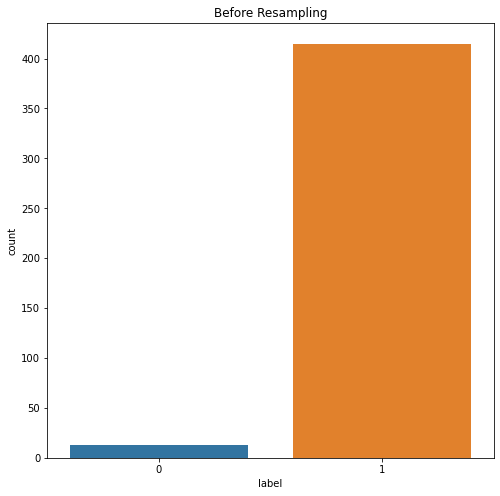

In [71]:
plt.figure(figsize=(8, 8))
sns.countplot(df['label'], data=df)
plt.title('Before Resampling')
plt.show()

In [72]:
df['label'].value_counts()

1    415
0     13
Name: label, dtype: int64

# Training and Testing of dataset with 90:10 split of train and test data

In [73]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=42, stratify=df['label'])

In [74]:
# Load the dataset
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#Balance dataset using SMOTE (Oversampling)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

#Balance dataset using RandomUndersampling (Undersampling)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [75]:
# describes info about train and test set
print('Imbalanced Train Data:')
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print('*********************************')
print('Oversampling Train Data:')
print("X_train dataset: ", X_train_smote.shape)
print("y_train dataset: ", y_train_smote.shape)
print('*********************************')
print('Undersampling Train Data:')
print("X_train dataset: ", X_train_rus.shape)
print("y_train dataset: ", y_train_rus.shape)
print('*********************************')
print('Test Data:')
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

Imbalanced Train Data:
X_train dataset:  (385, 25)
y_train dataset:  (385, 1)
*********************************
Oversampling Train Data:
X_train dataset:  (746, 25)
y_train dataset:  (746, 1)
*********************************
Undersampling Train Data:
X_train dataset:  (24, 25)
y_train dataset:  (24, 1)
*********************************
Test Data:
X_test dataset:  (43, 25)
y_test dataset:  (43, 1)


In [76]:
y_test.value_counts()

label
1        42
0         1
dtype: int64

## Spot Check Algorithms and Evaluation Metrics

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from numpy import mean
from numpy import std
import numpy as np
import math

### Include Stacking and Bagging Ensemble in building models

In [78]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models = dict()
models['Random Forest'] = RandomForestClassifier(n_estimators=100)
models['Logistic Regression'] = LogisticRegression()
models['SVM linear'] = SVC(kernel = 'linear')
models['SVM poly'] = SVC(kernel = 'poly')
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models['Decision Tree'] = DecisionTreeClassifier()
models['stacking'] = get_stacking()
models['bagging'] = BaggingClassifier()

In [79]:
results = dict()
print('\n******************************************************')
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\line


Algorithm:  Random Forest
Confusion Matrix:
 [[ 0  1]
 [ 0 42]]
Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.977     1.000     0.988        42

    accuracy                          0.977        43
   macro avg      0.488     0.500     0.494        43
weighted avg      0.954     0.977     0.965        43

AUC-ROC Score: 0.500

******************************************************

Algorithm:  Logistic Regression
Confusion Matrix:
 [[ 0  1]
 [ 0 42]]
Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.977     1.000     0.988        42

    accuracy                          0.977        43
   macro avg      0.488     0.500     0.494        43
weighted avg      0.954     0.977     0.965        43

AUC-ROC Score: 0.500

*****************************************************

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Algorithm:  Artificial Neural Network
Confusion Matrix:
 [[ 0  1]
 [ 0 42]]
Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.977     1.000     0.988        42

    accuracy                          0.977        43
   macro avg      0.488     0.500     0.494        43
weighted avg      0.954     0.977     0.965        43

AUC-ROC Score: 0.500

******************************************************

Algorithm:  Decision Tree
Confusion Matrix:
 [[ 0  1]
 [ 6 36]]
Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.973     0.857     0.911        42

    accuracy                          0.837        43
   macro avg      0.486     0.429     0.456        43
weighted avg      0.950     0.837     0.890        43

AUC-ROC Score: 0.429

***********************************************

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\line


Algorithm:  stacking
Confusion Matrix:
 [[ 0  1]
 [ 0 42]]
Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.977     1.000     0.988        42

    accuracy                          0.977        43
   macro avg      0.488     0.500     0.494        43
weighted avg      0.954     0.977     0.965        43

AUC-ROC Score: 0.500

******************************************************

Algorithm:  bagging
Confusion Matrix:
 [[ 0  1]
 [ 2 40]]
Accuracy: 0.9302325581395349
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.976     0.952     0.964        42

    accuracy                          0.930        43
   macro avg      0.488     0.476     0.482        43
weighted avg      0.953     0.930     0.941        43

AUC-ROC Score: 0.476

******************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resampling the trained data using Oversampling method (SMOTE)

### Include Stacking and Bagging Ensemble in building models

In [80]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models_smote = dict()
models_smote['Random Forest'] = RandomForestClassifier(n_estimators=100)
models_smote['Logistic Regression'] = LogisticRegression()
models_smote['SVM linear'] = SVC(kernel = 'linear')
models_smote['SVM poly'] = SVC(kernel = 'poly')
models_smote['Naive Bayes'] = GaussianNB()
models_smote['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models_smote['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models_smote['Decision Tree'] = DecisionTreeClassifier()
models_smote['stacking'] = get_stacking()
models_smote['bagging'] = BaggingClassifier()

In [81]:
results = dict()
print('\n******************************************************')
for name, model in models_smote.items():
    model.fit(X_train_smote, y_train_smote.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('\n     Route 1')
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************

Algorithm:  Random Forest

     Route 1
Confusion Matrix:
 [[ 0  1]
 [ 0 42]]
Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.977     1.000     0.988        42

    accuracy                          0.977        43
   macro avg      0.488     0.500     0.494        43
weighted avg      0.954     0.977     0.965        43

AUC-ROC Score: 0.500

******************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\line


Algorithm:  Logistic Regression

     Route 1
Confusion Matrix:
 [[ 0  1]
 [ 5 37]]
Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.974     0.881     0.925        42

    accuracy                          0.860        43
   macro avg      0.487     0.440     0.463        43
weighted avg      0.951     0.860     0.903        43

AUC-ROC Score: 0.440

******************************************************

Algorithm:  SVM linear

     Route 1
Confusion Matrix:
 [[ 0  1]
 [ 3 39]]
Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.975     0.929     0.951        42

    accuracy                          0.907        43
   macro avg      0.487     0.464     0.476        43
weighted avg      0.952     0.907     0.929        43

AUC-ROC Score: 0.464

****************************

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Algorithm:  stacking

     Route 1
Confusion Matrix:
 [[ 0  1]
 [ 1 41]]
Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.976     0.976     0.976        42

    accuracy                          0.953        43
   macro avg      0.488     0.488     0.488        43
weighted avg      0.953     0.953     0.953        43

AUC-ROC Score: 0.488

******************************************************

Algorithm:  bagging

     Route 1
Confusion Matrix:
 [[ 1  0]
 [ 2 40]]
Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0      0.333     1.000     0.500         1
           1      1.000     0.952     0.976        42

    accuracy                          0.953        43
   macro avg      0.667     0.976     0.738        43
weighted avg      0.984     0.953     0.965        43

AUC-ROC Score: 0.976

******************************************

## Resampling the trained data using Undersampling method (Random Undersampling)

### Include Stacking and Bagging Ensemble in building models

In [82]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models_rus = dict()
models_rus['Random Forest'] = RandomForestClassifier(n_estimators=100)
models_rus['Logistic Regression'] = LogisticRegression()
models_rus['SVM linear'] = SVC(kernel = 'linear')
models_rus['SVM poly'] = SVC(kernel = 'poly')
models_rus['Naive Bayes'] = GaussianNB()
models_rus['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models_rus['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models_rus['Decision Tree'] = DecisionTreeClassifier()
models_rus['stacking'] = get_stacking()
models_rus['bagging'] = BaggingClassifier()

In [83]:
results = dict()
print('\n******************************************************')
for name, model in models_rus.items():
    model.fit(X_train_rus, y_train_rus.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('\n     Route 1')
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************

Algorithm:  Random Forest

     Route 1
Confusion Matrix:
 [[ 1  0]
 [29 13]]
Accuracy: 0.32558139534883723
              precision    recall  f1-score   support

           0      0.033     1.000     0.065         1
           1      1.000     0.310     0.473        42

    accuracy                          0.326        43
   macro avg      0.517     0.655     0.269        43
weighted avg      0.978     0.326     0.463        43

AUC-ROC Score: 0.655

******************************************************

Algorithm:  Logistic Regression

     Route 1
Confusion Matrix:
 [[ 1  0]
 [26 16]]
Accuracy: 0.3953488372093023
              precision    recall  f1-score   support

           0      0.037     1.000     0.071         1
           1      1.000     0.381     0.552        42

    accuracy                          0.395        43
   macro avg      0.519     0.690     0.312        43
weighted avg      0.978     0.395     0.541  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 SVM poly

     Route 1
Confusion Matrix:
 [[ 0  1]
 [14 28]]
Accuracy: 0.6511627906976745
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.966     0.667     0.789        42

    accuracy                          0.651        43
   macro avg      0.483     0.333     0.394        43
weighted avg      0.943     0.651     0.770        43

AUC-ROC Score: 0.333

******************************************************

Algorithm:  Naive Bayes

     Route 1
Confusion Matrix:
 [[ 0  1]
 [ 5 37]]
Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.974     0.881     0.925        42

    accuracy                          0.860        43
   macro avg      0.487     0.440     0.463        43
weighted avg      0.951     0.860     0.903        43

AUC-ROC Score: 0.440

**************************************************

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Algorithm:  Artificial Neural Network

     Route 1
Confusion Matrix:
 [[ 0  1]
 [15 27]]
Accuracy: 0.627906976744186
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.964     0.643     0.771        42

    accuracy                          0.628        43
   macro avg      0.482     0.321     0.386        43
weighted avg      0.942     0.628     0.753        43

AUC-ROC Score: 0.321

******************************************************

Algorithm:  Decision Tree

     Route 1
Confusion Matrix:
 [[ 0  1]
 [28 14]]
Accuracy: 0.32558139534883723
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.933     0.333     0.491        42

    accuracy                          0.326        43
   macro avg      0.467     0.167     0.246        43
weighted avg      0.912     0.326     0.480        43

AUC-ROC Score: 0.167

*******************

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Algorithm:  stacking

     Route 1
Confusion Matrix:
 [[ 1  0]
 [30 12]]
Accuracy: 0.3023255813953488
              precision    recall  f1-score   support

           0      0.032     1.000     0.062         1
           1      1.000     0.286     0.444        42

    accuracy                          0.302        43
   macro avg      0.516     0.643     0.253        43
weighted avg      0.977     0.302     0.436        43

AUC-ROC Score: 0.643

******************************************************

Algorithm:  bagging

     Route 1
Confusion Matrix:
 [[ 1  0]
 [30 12]]
Accuracy: 0.3023255813953488
              precision    recall  f1-score   support

           0      0.032     1.000     0.062         1
           1      1.000     0.286     0.444        42

    accuracy                          0.302        43
   macro avg      0.516     0.643     0.253        43
weighted avg      0.977     0.302     0.436        43

AUC-ROC Score: 0.643

******************************************

In [84]:
break

SyntaxError: 'break' outside loop (<ipython-input-84-6aaf1f276005>, line 1)

In [ ]:
import pickle
pickle.dump(models_smote['bagging'],open('thesis_model_rev.pkl','wb'))

## Batch Prediction

In [ ]:
# test the model saved as a pickle
test_model = pickle.load(open('thesis_model_rev.pkl','rb'))

In [ ]:
X_test.shape, y_test.shape

In [ ]:
# select random data from test dataset
new_xdata = X_test.sample(43)
new_ydata = y_test['label'].loc[new_xdata.index.values]
print(new_xdata)
print(new_ydata)

In [ ]:
pred = test_model.predict(new_xdata)
print(pred)

In [ ]:
print(new_ydata.values)

In [ ]:
table = pd.DataFrame({'Prediction': pred, 'True Value': new_ydata.values})
table.head()

In [ ]:
cm = confusion_matrix(table['True Value'], table['Prediction'])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()

In [ ]:
print(classification_report(table['True Value'], table['Prediction'], digits=3))

In [ ]:
table[table['True Value'] == 0]

In [ ]:
table[table['Prediction'] == 0]

In [ ]:
new_xdata.iloc[41]